In [1]:
# exploration sheet


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
%matplotlib inline

import matplotlib as mpl 

## agg backend is used to create plot as a .png file
mpl.use('agg')

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:1352: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [27]:
data = pd.read_csv('data/cs-training.csv', index_col='id')


In [165]:
data['age'].hist()


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
id,,,,,,,,,,
1,0.766127,45,2,0.802982,9120,13,0,6,0,2
2,0.957151,40,0,0.121876,2600,4,0,0,0,1
3,0.658180,38,1,0.085113,3042,2,1,0,0,0
4,0.233810,30,0,0.036050,3300,5,0,0,0,0
5,0.907239,49,1,0.024926,63588,7,0,1,0,0


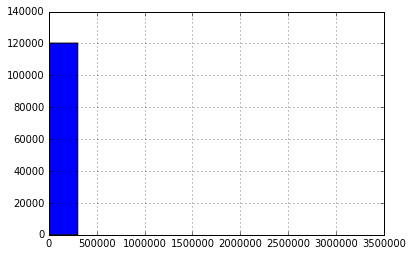

In [101]:
data['MonthlyIncome'].hist()


In [28]:
data['MonthlyIncome_NA_IND'] = 0
data.loc[data.MonthlyIncome.isnull(), 'MonthlyIncome_NA_IND'] = 1

#filling the monthly nas with the mean of monthly income
data.MonthlyIncome.fillna(data.MonthlyIncome.mean(), inplace=True)



In [29]:
#removing outliers
#MonthlyIncome values above the 99.9th percentile were dropped
percentile_ab = data['MonthlyIncome'].quantile(0.999)
data = data[-(data['MonthlyIncome'] > percentile_ab)]



6478.7797571499941

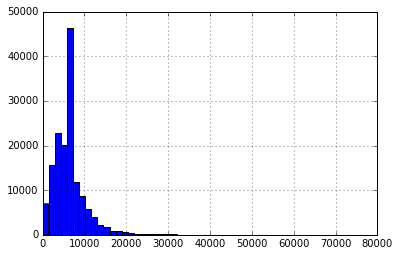

In [287]:
data.MonthlyIncome.hist(bins=50)
data.MonthlyIncome.mean()

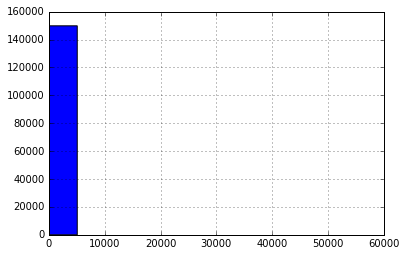

In [81]:
data['RevolvingUtilizationOfUnsecuredLines'].hist()

In [30]:
# Since the variable should be the ratio of
# unsecured loans that are being utilized, values between 0 and 1 should make up most of the
# observations.
data.reset_index(drop=True, inplace=True)

# The values over 10 were adjusted by moving the decimal place to
# the correct position and an indicator variable was created. 
unsecuredLines = [float(x) / 10000 if x > 10 else x for x in data['RevolvingUtilizationOfUnsecuredLines']]
data['RevolvingUtilizationOfUnsecuredLines'] = pd.Series(unsecuredLines)
# a = pd.Series(unsecuredLines)



In [6]:
data['RevolvingUtilizationOfUnsecuredLines'].isnull().sum()


0

count    149850.000000
mean          0.322868
std           0.367072
min           0.000000
25%           0.029840
50%           0.153785
75%           0.555811
max           8.851852
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

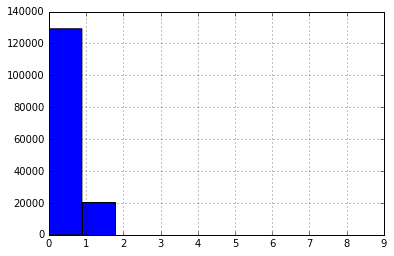

In [7]:
data['RevolvingUtilizationOfUnsecuredLines'].hist()
data['RevolvingUtilizationOfUnsecuredLines'].describe()

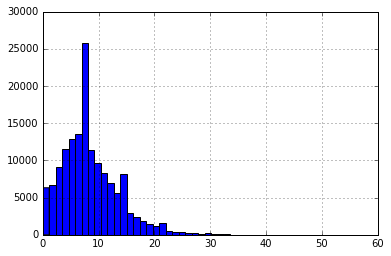

In [13]:
data['NumberOfOpenCreditLinesAndLoans'].hist(bins=50)

In [31]:
#  NumberOfOpenCreditLinesAndLoans values above the 99.9th
# percentile were dropped. 
quaOPenLoans = data['NumberOfOpenCreditLinesAndLoans'].quantile(0.999)
data = data.loc[-(data['NumberOfOpenCreditLinesAndLoans'] > quaOPenLoans), :]

data.reset_index(drop=True, inplace=True)


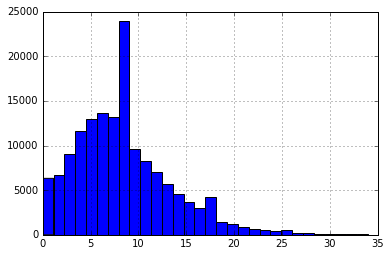

In [128]:
data['NumberOfOpenCreditLinesAndLoans'].hist(bins=30)

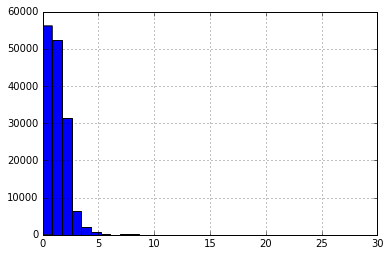

In [51]:
data['NumberRealEstateLoansOrLines'].hist(bins=30)

In [32]:
#  NumberRealEstateLoansOrLines values above the 99.9th percentile
# were dropped. 
estate_qua = data['NumberRealEstateLoansOrLines'].quantile(0.99)
data = data[-(data['NumberRealEstateLoansOrLines'] > estate_qua)]

data.reset_index(drop=True, inplace=True)



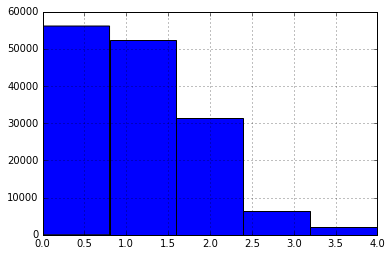

In [130]:
data.NumberRealEstateLoansOrLines.hist(bins=5)

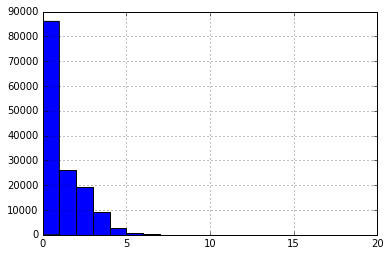

In [54]:
data.NumberOfDependents.hist(bins=20)

In [33]:
# and a
# NumberofDependents_NA_IND field was added to capture the N/A responses for that field
data['NumberofDependents_NA_IND'] = 0
data.loc[data['NumberOfDependents'].isnull(), 'NumberofDependents_NA_IND']= 1

In [34]:
# We
# then set the NumberofDependents missing values to 0. We made the assumption that most of the
# people who answered N/A did so because they had no dependents. After this was completed,
# NumberofDependents values above the 99.9th percentile were dropped.

data['NumberOfDependents'].fillna(0, inplace=True)

dependents_qua = data['NumberOfDependents'].quantile(0.99)
data = data.loc[-(data['NumberOfDependents'] > dependents_qua), :]

data.reset_index(drop=True, inplace=True)


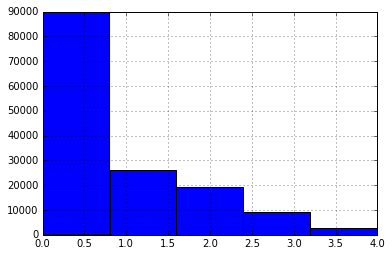

In [57]:
data['NumberOfDependents'].hist(bins=5)

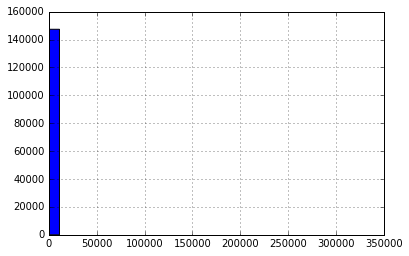

In [58]:
data.DebtRatio.hist(bins=30)

In [59]:
# data.loc[data['NumberOfTime30-59DaysPastDueNotWorse'] > 80, 'NumberOfTime30-59DaysPastDueNotWorse'] = data['NumberOfTime30-59DaysPastDueNotWorse'].mean()

In [60]:
# data['NumberOfTime30-59DaysPastDueNotWorse'].hist(bins=9)

In [35]:
# The values of 96 and 98 were changed to missing values and then
# replaced with the mean of the variable.
def clean_del(col):
    data.loc[data[col] > 80, col] = data[col].mean()

clean_del('NumberOfTime60-89DaysPastDueNotWorse')
clean_del('NumberOfTimes90DaysLate')
clean_del('NumberOfTime30-59DaysPastDueNotWorse')


In [36]:
data.iloc[:,:-2].head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
1,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
2,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
3,0,0.907239,49,1,0.024926,63588,7,0,1,0,0
4,0,0.213179,74,0,0.375607,3500,3,0,1,0,1


In [62]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,NumberofDependents_NA_IND
count,147415.000000,147414.000000,147415.000000,147415.000000,147415.000000,117983.000000,147415.000000,147415.000000,147415.000000,147415.000000,147415.000000,147415.000000
mean,0.065753,0.323167,52.319493,0.243468,343.037145,6565.879245,8.339199,0.090770,0.960655,0.064756,0.704847,0.026503
std,0.247851,0.367257,14.835544,0.692059,2003.667761,14362.563776,4.973422,0.482548,0.942993,0.327557,1.039213,0.160627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029832,41.000000,0.000000,0.172805,3367.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154034,52.000000,0.000000,0.363455,5333.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.556480,63.000000,0.000000,0.861840,8100.000000,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,1.000000,8.851852,109.000000,13.000000,329664.000000,3008750.000000,34.000000,17.000000,4.000000,11.000000,4.000000,1.000000


In [37]:
data = data.iloc[:, :-2]

In [38]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
1,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
2,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
3,0,0.907239,49,1,0.024926,63588,7,0,1,0,0
4,0,0.213179,74,0,0.375607,3500,3,0,1,0,1


In [39]:
from sklearn import preprocessing
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, recall_score

from imblearn.over_sampling import SMOTE

In [40]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0])

In [41]:
data.iloc[:,1:].head()
# data_test.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.957151,40,0,0.121876,2600,4,0,0,0,1
1,0.658180,38,1,0.085113,3042,2,1,0,0,0
2,0.233810,30,0,0.036050,3300,5,0,0,0,0
3,0.907239,49,1,0.024926,63588,7,0,1,0,0
4,0.213179,74,0,0.375607,3500,3,0,1,0,1


In [42]:
#rebalancing the training dataset

sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)


/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [43]:
#scalling the features training and test data sets
scaler = preprocessing.StandardScaler().fit(x_train_res)
scaled_data_x_train = scaler.transform(x_train_res)
scaled_data_x_test = scaler.transform(x_test)

In [44]:
model = LogisticRegression()
model.fit(scaled_data_x_train, y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
predicted = model.predict(scaled_data_x_test)
# predicted_train = model.predict(scaled_data_x_train)

In [46]:
print classification_report(y_test, predicted)

             precision    recall  f1-score   support

          0       0.98      0.83      0.90     34432
          1       0.23      0.71      0.34      2388

avg / total       0.93      0.82      0.86     36820



In [47]:
x_test.shape

(36820, 10)

In [48]:
data_test = pd.read_csv('data/cs-test.csv', index_col='id')
data_test.drop('SeriousDlqin2yrs', 1, inplace=True)

In [49]:
data_test['MonthlyIncome'].fillna(data_test['MonthlyIncome'].mean(), inplace=True)
data_test['NumberOfDependents'].fillna(0, inplace=True)

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            101494, 101495, 101496, 101497, 101498, 101499, 101500, 101501,
            101502, 101503],
           dtype='int64', name=u'id', length=101503)

In [50]:
scaler = preprocessing.StandardScaler().fit(data_test)
scaled_test = scaler.transform(data_test)

In [51]:
predicted_test = model.predict_proba(scaled_test)

In [53]:
output = pd.DataFrame({'id':data_test.index, 'probability':predicted_test[:, 1]})

In [54]:
output.to_csv("predictions.csv", index=False)